# <span style="color:#e53935;font-size:10vw;font-weight:800;text-shadow:2px 2px 4px #aaa">Mnist CNN</span>
# <span style="font-size:6vw;font-weight:800;text-shadow:2px 2px 10px #aaa">Two Days Faculty Development Programe</span>
## <span style="font-size:4vw;font-weight:800">Alok Pandey <br> Ashvini Jangid</span>
## <span style="font-size:4vw;font-weight:800"><a href="https://imjangid.xyz">ashvinijangid@gmail.com</a></span>

In [3]:
from keras.datasets import mnist
from matplotlib import pyplot
from PIL.Image import fromarray
from warnings import filterwarnings
import os
filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "3"

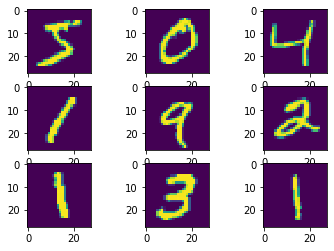

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(fromarray(X_train[i]))
pyplot.show()

In [27]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [28]:
img_rows, img_cols = 28, 28

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [30]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [34]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [35]:
model = Sequential()
model.add(
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=10,
          validation_data=(x_test, y_test))

W0716 19:26:17.712443 139939118733120 deprecation.py:323] From /home/ash/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 84s 1ms/step - loss: 8.7943 - acc: 0.4484 - val_loss: 2.7765 - val_acc: 0.8198
Epoch 2/10
60000/60000 [==============================] - 87s 1ms/step - loss: 1.0665 - acc: 0.8907 - val_loss: 0.1102 - val_acc: 0.9693
Epoch 3/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.1695 - acc: 0.9535 - val_loss: 0.0660 - val_acc: 0.9808
Epoch 4/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.1200 - acc: 0.9675 - val_loss: 0.0498 - val_acc: 0.9858
Epoch 5/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0927 - acc: 0.9734 - val_loss: 0.0519 - val_acc: 0.9850
Epoch 6/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0842 - acc: 0.9755 - val_loss: 0.0508 - val_acc: 0.9847
Epoch 7/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0740 - acc: 0.9792 - val_loss: 0.0390 - val_acc

In [36]:
score = model.evaluate(x_test, y_test, verbose=0)
print(('Test loss:', score[0]))
print(('Test accuracy:', score[1]))

('Test loss:', 0.04007009056519119)
('Test accuracy:', 0.988)
